In [1]:
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Ocekivace se matrice, tj. tenzori sa 3 dimenzije (treca dimenzija zbog boje, ovde je samo 1 kanal za boju).

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
import keras.backend as K

In [5]:
# (60000, 1, 28, 28)
# (60000, 28, 28, 1)
img_size = X_train.shape[1]
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_size, img_size)
    X_test = X_test.reshape(X_test.shape[0], 1, img_size, img_size)
else:
    X_train = X_train.reshape(X_train.shape[0], img_size, img_size, 1)
    X_test = X_test.reshape(X_test.shape[0], img_size, img_size, 1)

In [6]:
X_train.shape

(60000, 28, 28, 1)

Normalizacija [0, 1]

In [7]:
X_train = X_train / 255

In [8]:
X_test = X_test / 255

In [9]:
y_train.shape

(60000,)

In [10]:
y_train[0]

5

Da bi postojalo 10 kategorija.

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [13]:
y_train.shape

(60000, 10)

Instanca je niz od 10 brojeva.

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Conv2D - za konvolucione mreze, za slike je 2D.

Konvolucija se dobro primenjuje na slike u 2D ili zvuk u 1D, reci kao signali u 1D.

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

input_shape - potreban je za konvolucioni model

In [16]:
input_shape = X_train.shape[1:]
input_shape

(28, 28, 1)

Broj filtera prvi argument Conv2D

kernel_size - velicina filtera (uglavnom neparnih dimenzija, male dimenzije)

strides - za preskakanje pozicija, da bi se brze smanjila dimenzija

padding - 'same' (da se dobije rezultat iste dimenzije koje je slika, u novi okvir od 1pix se stavljaju 0 sa 'same'), moze da se u taj okvir stave vrednosti suseda.

input_shape - dimenzija ulaza

pool_size - npr iz kvadrata velicine 2x2 da se izvlaci broj (max, mean)


Dropout - koristi se za regularizaciju mreze, izlazi iz 20% neurona iz Pool-a da se postave na nulu, kao da nista nije ni radjeno, aktivan je dok se trenira. Random bira 20% neurona koje ubija.

Dense - broj neurona i aktivaciona funkcija



In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
#
model.add(Dropout(0.5))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 13s 7ms/step - loss: 0.4608 - accuracy: 0.8555 - val_loss: 0.0848 - val_accuracy: 0.9748
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1591 - accuracy: 0.9525 - val_loss: 0.0590 - val_accuracy: 0.9812
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1208 - accuracy: 0.9646 - val_loss: 0.0449 - val_accuracy: 0.9866
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0975 - accuracy: 0.9720 - val_loss: 0.0465 - val_accuracy: 0.9858
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0868 - accuracy: 0.9744 - val_loss: 0.0412 - val_accuracy: 0.9879
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0773 - accuracy: 0.9766 - val_loss: 0.0415 - val_accuracy: 0.9882
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0712 - accuracy: 0.9787 - val_loss: 0.0362 - val_accuracy: 0.9902
Epoch

In [20]:
from matplotlib import pyplot as plt

Dropout je radio samo na trening skupu, ne radi na validacionom, zato su nelogicni rezultati (bolji na validacionom nego na testnom skupu).

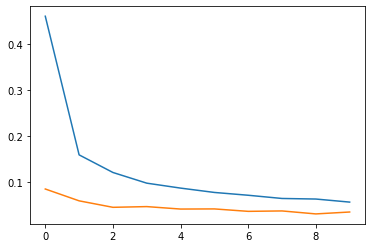

In [21]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

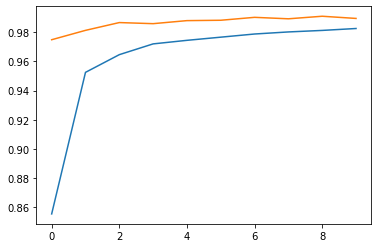

In [22]:
plt.plot(history.epoch, history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'])

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0262 - accuracy: 0.9913


[0.02624542824923992, 0.9912999868392944]

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [25]:
y_test.shape

(10000, 10)

In [26]:
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)

confusion_matrix(y_true, y_pred)

array([[ 978,    0,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1131,    2,    1,    0,    0,    0,    1,    0,    0],
       [   1,    2, 1023,    1,    0,    0,    0,    5,    0,    0],
       [   0,    0,    2, 1003,    0,    2,    0,    2,    1,    0],
       [   0,    0,    0,    0,  972,    0,    1,    0,    1,    8],
       [   1,    0,    0,    6,    0,  881,    3,    1,    0,    0],
       [   4,    2,    1,    0,    2,    2,  947,    0,    0,    0],
       [   0,    1,    4,    0,    0,    0,    0, 1022,    1,    0],
       [   1,    1,    3,    1,    0,    1,    2,    1,  961,    3],
       [   1,    1,    0,    0,    2,    3,    0,    6,    1,  995]])

In [27]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

